In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.evaluate import bias_variance_decomp
import sklearn
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('Carseats.csv')
df1 = df.copy()

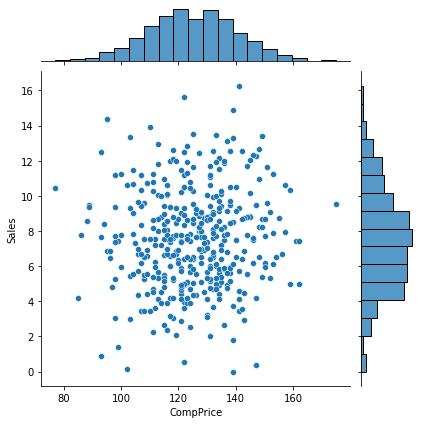

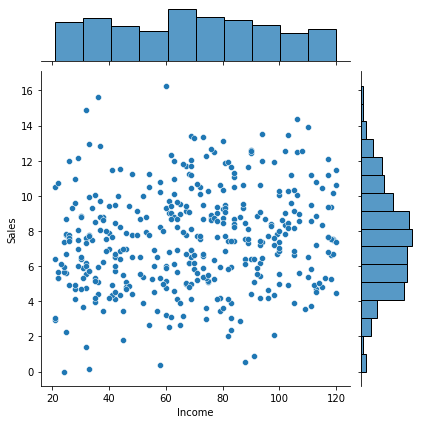

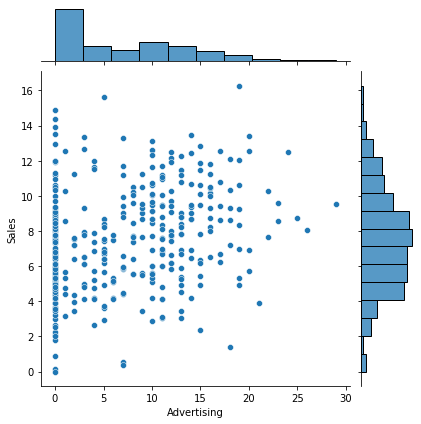

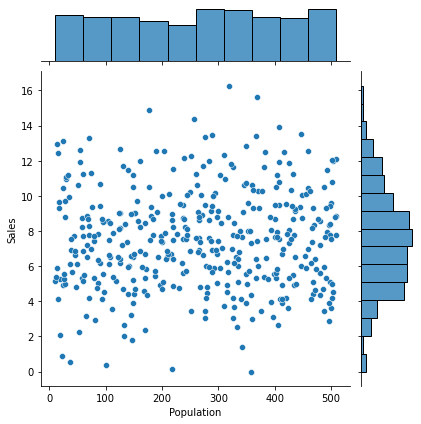

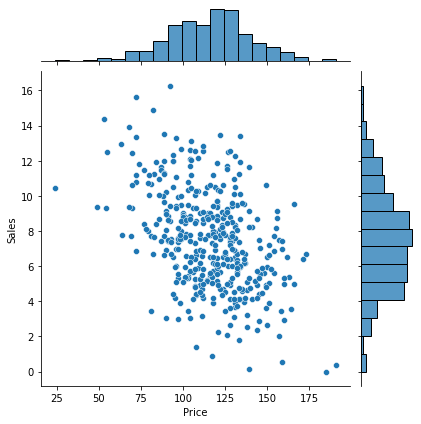

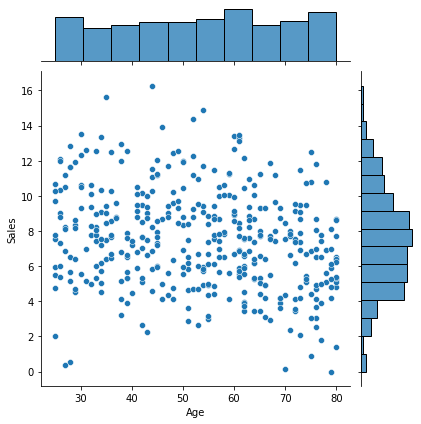

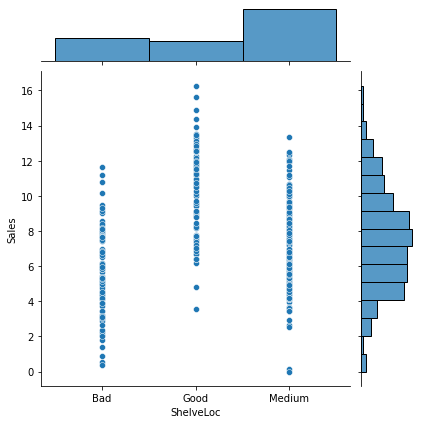

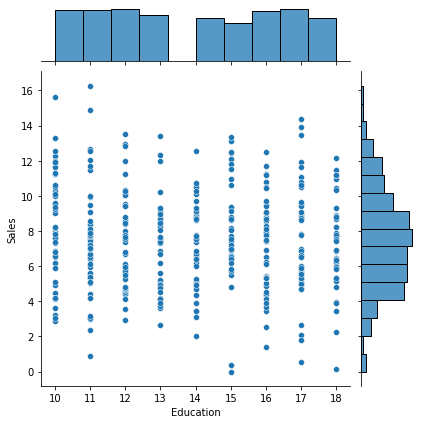

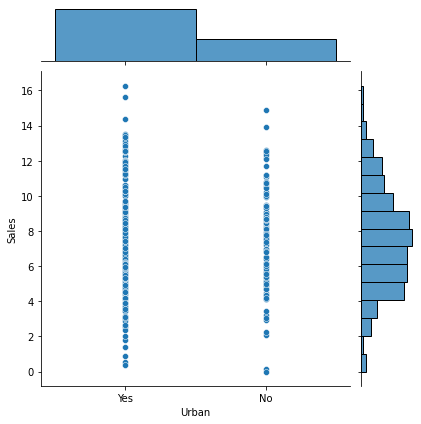

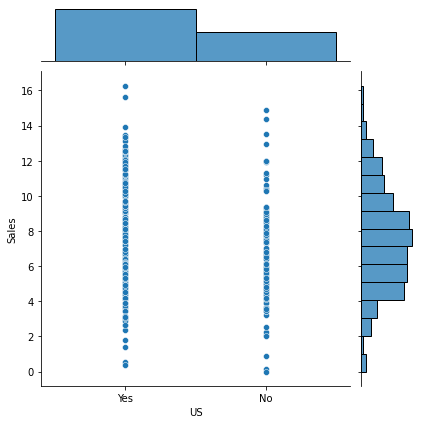

In [15]:
sns.jointplot(x = df['CompPrice'],y = df['Sales'],kind = 'scatter')
sns.jointplot(x = df['Income'],y = df['Sales'],kind = 'scatter')
sns.jointplot(x = df['Advertising'],y = df['Sales'],kind = 'scatter')
sns.jointplot(x = df['Population'],y = df['Sales'],kind = 'scatter')
sns.jointplot(x = df['Price'],y = df['Sales'],kind = 'scatter')
sns.jointplot(x = df['Age'],y = df['Sales'],kind = 'scatter')
sns.jointplot(x = df['ShelveLoc'],y = df['Sales'],kind = 'scatter')
sns.jointplot(x = df['Education'],y = df['Sales'],kind = 'scatter')
sns.jointplot(x = df['Urban'],y = df['Sales'],kind = 'scatter')
sns.jointplot(x = df['US'],y = df['Sales'],kind = 'scatter')

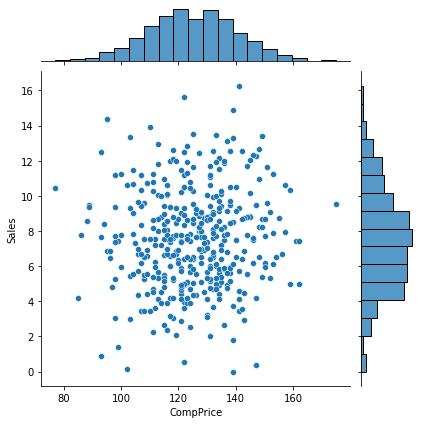

In [10]:
sns.jointplot(x = df['CompPrice'],y = df['Sales'],kind = 'scatter')

/Users/yuyongqi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yuyongqi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/yuyongqi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  w

<AxesSubplot:xlabel='US', ylabel='count'>

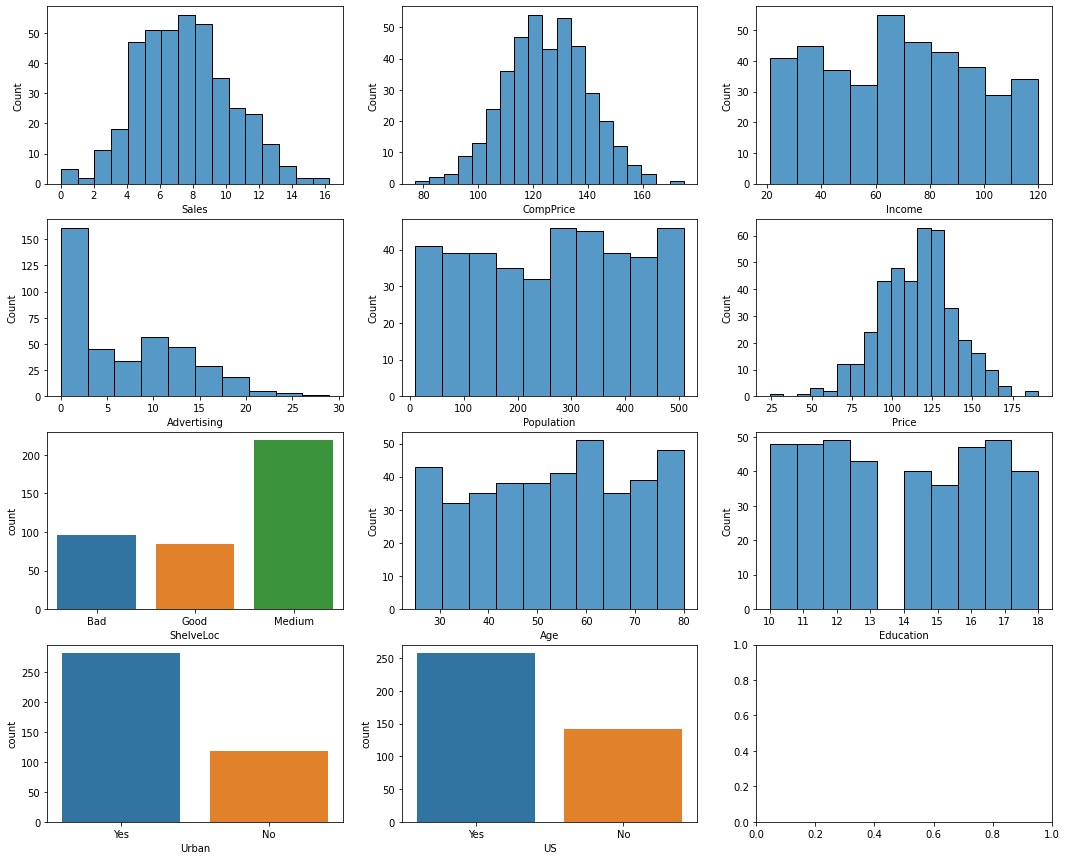

In [92]:
#Data statistics
fig, axes = plt.subplots(4, 3, figsize=(18, 15))
sns.histplot(df["Sales"],ax=axes[0,0])
sns.histplot(df["CompPrice"],ax=axes[0,1])
sns.histplot(df["Income"],ax=axes[0,2])
sns.histplot(df["Advertising"],ax=axes[1,0])
sns.histplot(df["Population"],ax=axes[1,1])
sns.histplot(df["Price"],ax=axes[1,2])
sns.countplot(df["ShelveLoc"],ax=axes[2,0])
sns.histplot(df["Age"],ax=axes[2,1])
sns.histplot(df["Education"],ax=axes[2,2])
sns.countplot(df["Urban"],ax=axes[3,0])
sns.countplot(df["US"],ax=axes[3,1])

In [3]:
#binary encode for the features 'Urban' and 'US'
df1.loc[df['Urban']=='Yes','Urban'] = 1
df1.loc[df['Urban']=='No','Urban'] = -1
df1.loc[df['US']=='Yes','US'] = 1
df1.loc[df['US']=='No','US'] = -1
#one hot encode for 'ShelveLoc'
sl = OneHotEncoder().fit_transform(np.array(df['ShelveLoc']).reshape(-1,1)).toarray()
df1['ShelveLoc1'] = sl[:,0]
df1['ShelveLoc2'] = sl[:,1]
df1['ShelveLoc3'] = sl[:,2]
df1 = df1.drop('ShelveLoc',axis=1)

In [36]:
#binary encode for the features 'Urban' and 'US'
df1.loc[df['Urban']=='Yes','Urban'] = 1
df1.loc[df['Urban']=='No','Urban'] = 0
df1.loc[df['US']=='Yes','US'] = 1
df1.loc[df['US']=='No','US'] = 0
#one hot encode for 'ShelveLoc'
sl = OneHotEncoder().fit_transform(np.array(df['ShelveLoc']).reshape(-1,1)).toarray()
df1['ShelveLoc1'] = sl[:,0]
df1['ShelveLoc2'] = sl[:,1]
df1['ShelveLoc3'] = sl[:,2]
df1 = df1.drop('ShelveLoc',axis=1)

In [12]:
df1.loc[df['Urban']=='Yes','Urban'] = 1
df1.loc[df['Urban']=='No','Urban'] = -1
df1.loc[df['US']=='Yes','US'] = 1
df1.loc[df['US']=='No','US'] = -1
df1.loc[df['ShelveLoc']=='Bad','ShelveLoc'] = -1
df1.loc[df['ShelveLoc']=='Medium','ShelveLoc'] = 0
df1.loc[df['ShelveLoc']=='Good','ShelveLoc'] = 1

In [4]:
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc1,ShelveLoc2,ShelveLoc3
0,9.50,138,73,11,276,120,42,17,1,1,1.0,0.0,0.0
1,11.22,111,48,16,260,83,65,10,1,1,0.0,1.0,0.0
2,10.06,113,35,10,269,80,59,12,1,1,0.0,0.0,1.0
3,7.40,117,100,4,466,97,55,14,1,1,0.0,0.0,1.0
4,4.15,141,64,3,340,128,38,13,1,-1,1.0,0.0,0.0


In [5]:
features = df1.iloc[:,1:]
targets = df1.Sales
X_train,X_test = np.array(features[:300]),np.array(features[300:])
Y_train, Y_test = np.array(targets[:300]),np.array(targets[300:])

In [6]:
# a function to calculate the sum squared error
def SSE(y,y_predict):
    sse = 0
    for i in range(len(y)):
        sse += (y[i]-y_predict[i])**2
    return sse

In [39]:
reg = tree.DecisionTreeRegressor(criterion="mse")
reg.fit(X_train,Y_train)
predict = reg.predict(X_test)
SSE(predict,Y_test)

543.7801999999999

In [40]:
reg = BaggingRegressor(base_estimator=tree.DecisionTreeRegressor())
reg.fit(X_train,Y_train)
predict = reg.predict(X_test)
SSE(predict,Y_test)

265.52363899999995

In [41]:
reg = RandomForestRegressor()
reg.fit(X_train,Y_train)
predict = reg.predict(X_test)
SSE(predict,Y_test)

268.3004255300001

[Text(225.4974688200673, 210.645, 'X[5] <= 0.5\nmse = 8.012\nsamples = 300\nvalue = 7.363'),
 Text(161.65754974775786, 197.055, 'X[4] <= 124.5\nmse = 6.271\nsamples = 240\nvalue = 6.64'),
 Text(84.84751261210764, 183.465, 'X[6] <= 60.5\nmse = 5.568\nsamples = 156\nvalue = 7.43'),
 Text(56.581950672645746, 169.875, 'X[2] <= 7.5\nmse = 4.701\nsamples = 89\nvalue = 8.262'),
 Text(26.242264573991033, 156.285, 'X[5] <= -0.5\nmse = 4.458\nsamples = 55\nvalue = 7.457'),
 Text(10.759641255605382, 142.695, 'X[4] <= 92.0\nmse = 3.84\nsamples = 18\nvalue = 5.994'),
 Text(6.505829596412557, 129.10500000000002, 'X[0] <= 118.5\nmse = 1.128\nsamples = 7\nvalue = 7.833'),
 Text(4.003587443946189, 115.515, 'X[7] <= 13.0\nmse = 0.482\nsamples = 5\nvalue = 7.274'),
 Text(2.0017937219730944, 101.925, 'X[7] <= 11.5\nmse = 0.093\nsamples = 2\nvalue = 8.085'),
 Text(1.0008968609865472, 88.33500000000001, 'mse = 0.0\nsamples = 1\nvalue = 8.39'),
 Text(3.0026905829596418, 88.33500000000001, 'mse = -0.0\nsample

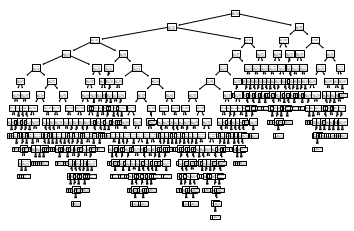

In [101]:
tree.plot_tree(reg)

<AxesSubplot:xlabel='max depth', ylabel='test loss'>

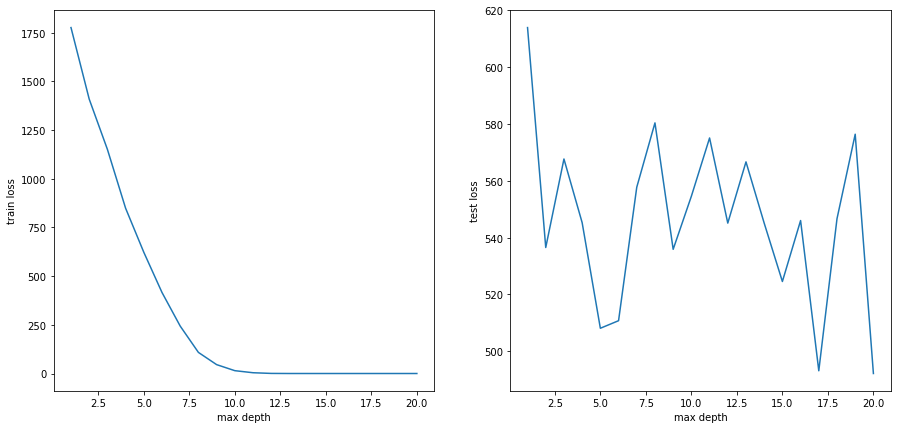

In [25]:
train_losses = []
test_losses = []
max_depths = [i for i in range(1,21)]
for max_depth in max_depths:
    reg = tree.DecisionTreeRegressor(criterion="mse",max_depth=max_depth)
    reg.fit(X_train,Y_train)
    predict_train = reg.predict(X_train)
    predict_test = reg.predict(X_test)
    train_losses.append(SSE(predict_train,Y_train))
    test_losses.append(SSE(predict_test,Y_test))
#plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
md_train = pd.DataFrame({'max depth':max_depths,'train loss':train_losses})
sns.lineplot(x='max depth',y='train loss',data = md_train,ax=axes[0])
md_test = pd.DataFrame({'max depth':max_depths,'test loss':test_losses})
sns.lineplot(x='max depth',y='test loss',data = md_test,ax=axes[1])

<AxesSubplot:xlabel='least node size', ylabel='test loss'>

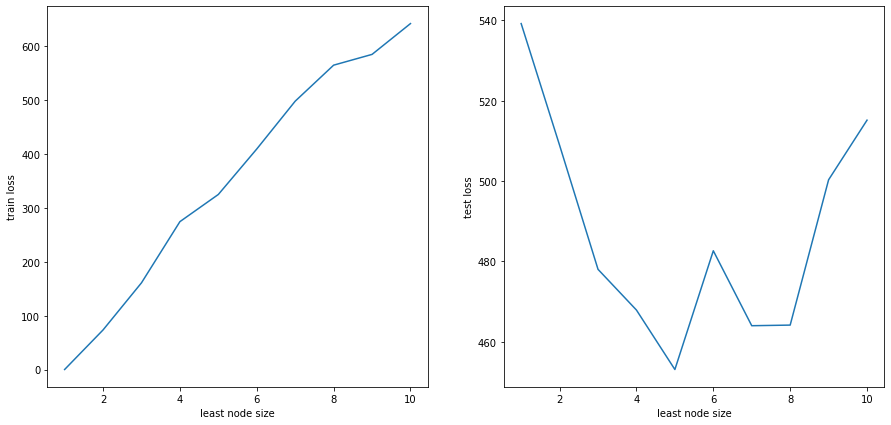

In [10]:
train_losses = []
test_losses = []
min_samples_leaves = [i for i in range(1,11)]
for node_size in min_samples_leaves:
    reg = tree.DecisionTreeRegressor(criterion="mse",min_samples_leaf=node_size)
    reg.fit(X_train,Y_train)
    predict_train = reg.predict(X_train)
    predict_test = reg.predict(X_test)
    train_losses.append(SSE(predict_train,Y_train))
    test_losses.append(SSE(predict_test,Y_test))
#plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
ln_train = pd.DataFrame({'least node size':min_samples_leaves,'train loss':train_losses})
sns.lineplot(x='least node size',y='train loss',data = ln_train,ax=axes[0])
ln_test = pd.DataFrame({'least node size':min_samples_leaves,'test loss':test_losses})
sns.lineplot(x='least node size',y='test loss',data = ln_test,ax=axes[1])

In [119]:
reg = BaggingRegressor(base_estimator=tree.DecisionTreeRegressor())
reg.fit(X_train,Y_train)
predict = reg.predict(X_test)
predict

array([ 7.679,  8.08 ,  3.79 ,  9.99 , 10.437,  6.793,  6.514,  5.978,
        6.548,  9.5  ,  8.027,  5.862,  4.742,  8.016,  9.145,  8.029,
       12.569,  8.591,  9.576,  6.214,  7.028,  6.199,  8.575,  9.163,
        3.949, 10.815,  7.325,  6.598,  4.753, 12.391,  5.272,  7.338,
        7.569,  5.865,  9.348,  8.398,  5.222,  6.909,  6.578,  8.804,
        6.687,  5.924,  8.868,  6.698,  9.932,  7.499,  5.85 ,  9.318,
       11.611, 10.281,  9.135,  8.968, 10.242,  9.84 ,  6.3  ,  9.6  ,
        8.808,  8.931,  4.668,  4.461, 10.451,  9.642,  5.362, 10.101,
        8.172,  5.289,  5.14 , 13.002, 11.367,  9.56 ,  6.857,  7.954,
        6.025,  6.533,  8.699,  5.691, 12.408,  6.303,  6.808,  4.459,
        8.108,  5.373,  7.645,  9.355,  9.604,  6.431,  5.809,  8.606,
        8.133,  8.829,  7.339,  7.49 ,  5.545,  7.344,  6.016, 10.83 ,
        7.42 ,  7.137,  6.361, 10.246])

<AxesSubplot:xlabel='depth', ylabel='test loss'>

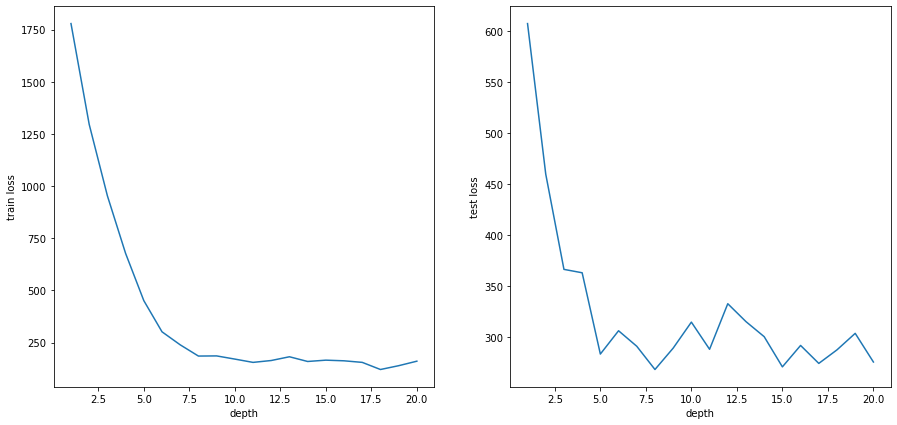

In [13]:
train_losses = []
test_losses = []
max_depths = [i for i in range(1,21)]
for max_depth in max_depths:
    reg = BaggingRegressor(tree.DecisionTreeRegressor(criterion="mse",max_depth=max_depth))
    reg.fit(X_train,Y_train)
    predict_train = reg.predict(X_train)
    predict_test = reg.predict(X_test)
    train_losses.append(SSE(predict_train,Y_train))
    test_losses.append(SSE(predict_test,Y_test))
#plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
md_train = pd.DataFrame({'depth':max_depths,'train loss':train_losses})
sns.lineplot(x='depth',y='train loss',data = md_train,ax=axes[0])
md_test = pd.DataFrame({'depth':max_depths,'test loss':test_losses})
sns.lineplot(x='depth',y='test loss',data = md_test,ax=axes[1])

<AxesSubplot:xlabel='number of trees', ylabel='test loss'>

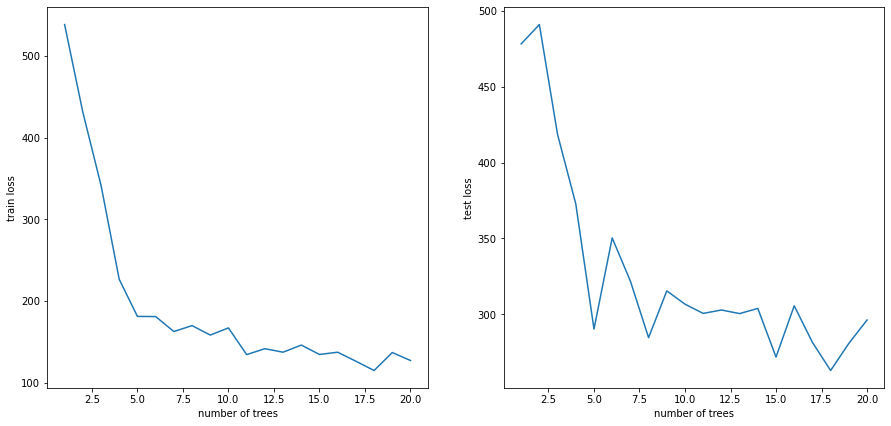

In [7]:
train_losses = []
test_losses = []
num_of_learner = [i for i in range(1,21)]
for num in num_of_learner:
    reg = BaggingRegressor(tree.DecisionTreeRegressor(criterion="mse"),n_estimators=num)
    reg.fit(X_train,Y_train)
    predict_train = reg.predict(X_train)
    predict_test = reg.predict(X_test)
    train_losses.append(SSE(predict_train,Y_train))
    test_losses.append(SSE(predict_test,Y_test))
#plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
nl_train = pd.DataFrame({'number of trees':num_of_learner,'train loss':train_losses})
sns.lineplot(x='number of trees',y='train loss',data = nl_train,ax=axes[0])
nl_test = pd.DataFrame({'number of trees':num_of_learner,'test loss':test_losses})
sns.lineplot(x='number of trees',y='test loss',data = nl_test,ax=axes[1])

In [15]:
reg = RandomForestRegressor()
reg.fit(X_train,Y_train)
predict = reg.predict(X_test)
predict

array([ 7.5999,  8.7818,  4.694 ,  9.2916,  9.0246,  6.306 ,  5.5384,
        6.0685,  6.6937,  8.9254,  6.0482,  5.8464,  4.9166,  8.2149,
        8.8739,  7.7713, 12.2448,  9.4039,  9.0811,  6.3356,  6.829 ,
        7.0934,  9.9327,  9.2047,  4.3038,  9.8857,  7.0146,  6.141 ,
        4.5275, 11.6502,  6.0246,  6.8629,  7.1884,  5.8027,  9.1049,
        7.6625,  5.19  ,  6.9266,  6.4504,  9.6285,  8.5948,  6.7587,
        8.4013,  7.1787,  9.9724,  7.8705,  6.3631,  8.9   , 11.9177,
        9.5548,  8.5334,  8.7165, 10.18  ,  9.2239,  5.5862,  8.5865,
        8.2706,  9.3784,  5.908 ,  5.2237, 10.1867,  8.6344,  4.8589,
       10.3917,  9.0001,  4.9727,  5.    , 11.9637, 10.9755,  9.1187,
        7.6586,  7.2376,  6.5623,  6.7866,  7.8208,  6.5524, 12.5576,
        6.1249,  6.6435,  5.6656,  7.636 ,  4.1571,  7.4508,  9.0934,
        9.8868,  5.8538,  5.5547,  7.9754,  8.884 ,  8.2383,  6.4987,
        7.1713,  6.0086,  7.2425,  5.7802, 10.9424,  7.7463,  5.6395,
        5.937 , 10.1

<AxesSubplot:xlabel='number of trees', ylabel='test loss'>

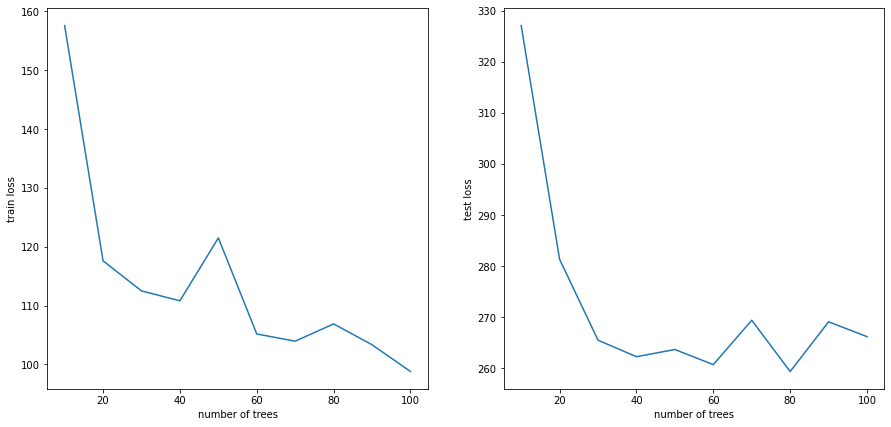

In [88]:
train_losses = []
test_losses = []
num_of_learner = [10*i for i in range(1,11)]
for num in num_of_learner:
    reg = RandomForestRegressor(n_estimators=num)
    reg.fit(X_train,Y_train)
    predict_train = reg.predict(X_train)
    predict_test = reg.predict(X_test)
    train_losses.append(SSE(predict_train,Y_train))
    test_losses.append(SSE(predict_test,Y_test))
#plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
nl_train = pd.DataFrame({'number of trees':num_of_learner,'train loss':train_losses})
sns.lineplot(x='number of trees',y='train loss',data = nl_train,ax=axes[0])
nl_test = pd.DataFrame({'number of trees':num_of_learner,'test loss':test_losses})
sns.lineplot(x='number of trees',y='test loss',data = nl_test,ax=axes[1])

<AxesSubplot:xlabel='value of m', ylabel='test loss'>

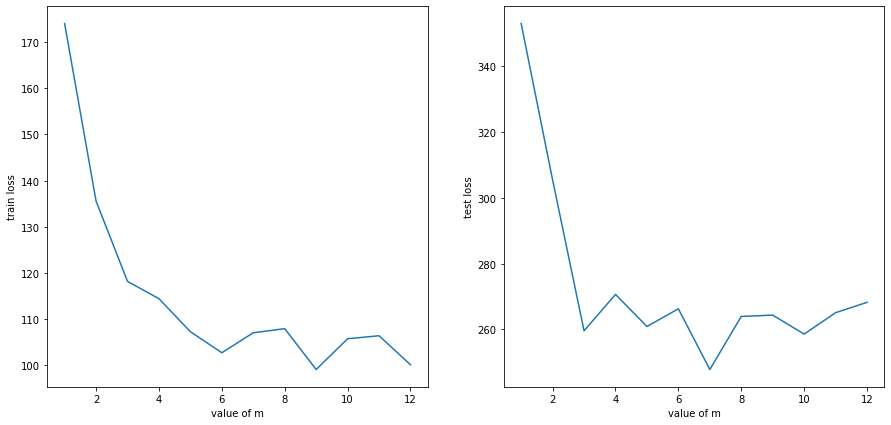

In [108]:
train_losses = []
test_losses = []
max_features = [i for i in range(1,11)]
for m in max_features:
    reg = RandomForestRegressor(max_features=m)
    reg.fit(X_train,Y_train)
    predict_train = reg.predict(X_train)
    predict_test = reg.predict(X_test)
    train_losses.append(SSE(predict_train,Y_train))
    test_losses.append(SSE(predict_test,Y_test))
#plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
mf_train = pd.DataFrame({'value of m':max_features,'train loss':train_losses})
sns.lineplot(x='value of m',y='train loss',data = mf_train,ax=axes[0])
mf_test = pd.DataFrame({'value of m':max_features,'test loss':test_losses})
sns.lineplot(x='value of m',y='test loss',data = mf_test,ax=axes[1])

In [7]:
def get_bias(y,h_mean):
    return np.mean((y-h_mean)**2)

def get_var(estimators,h_mean,X_test):
    s = 0
    for estimator in estimators:
        h = estimator.predict(X_test)
        s += np.mean((h-h_mean)**2)
    return s/len(estimators)

In [38]:
num_of_trees = [10*i for i in range(1,15)]
bias2 = []
v = []
variances = []
for num in num_of_trees:
    reg = RandomForestRegressor(n_estimators=num)
    reg.fit(X_train,Y_train)
    predict = reg.predict(X_test)
    bias2.append(get_bias(Y_test,predict))
    variances.append(get_var(reg.estimators_,predict,X_test))

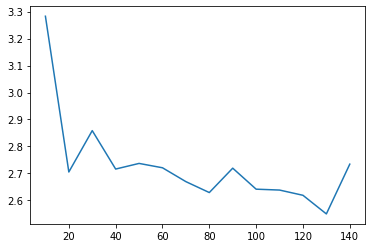

In [39]:
plt.plot(num_of_trees,bias2)

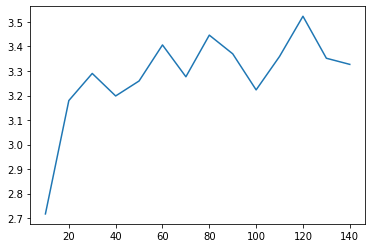

In [40]:
plt.plot(num_of_trees,variances)

In [7]:
reg = RandomForestRegressor()
reg.fit(X_train,Y_train)
predict = reg.predict(X_test)

In [10]:
a = np.array([1,3])
b = np.array([2,4])

In [13]:
np.mean((a-b)**2)

1.0

In [37]:
X = [[2,0,1,-1,1,2,-2,-2,-2,-3],
              [0,2,2,1,0,3,3,-2,-3,2],
              [1,-3,1,3,1,-1,3,2,1,0],
              [-3,-3,3,2,-1,1,3,3,-2,-1],
              [-2,-2,-2,-1,1,-2,2,-2,-3,-2]]

In [39]:
X

[[2, 0, 1, -1, 1, 2, -2, -2, -2, -3],
 [0, 2, 2, 1, 0, 3, 3, -2, -3, 2],
 [1, -3, 1, 3, 1, -1, 3, 2, 1, 0],
 [-3, -3, 3, 2, -1, 1, 3, 3, -2, -1],
 [-2, -2, -2, -1, 1, -2, 2, -2, -3, -2]]

In [47]:
X = np.array(X,dtype='object')
X

array([[2, 0, 1, -1, 1, 2, -2, -2, -2, -3],
       [0, 2, 2, 1, 0, 3, 3, -2, -3, 2],
       [1, -3, 1, 3, 1, -1, 3, 2, 1, 0],
       [-3, -3, 3, 2, -1, 1, 3, 3, -2, -1],
       [-2, -2, -2, -1, 1, -2, 2, -2, -3, -2]], dtype=object)

In [78]:
m = np.mean(X,axis=1)
m

array([-0.4, 0.8, 0.8, 0.2, -1.3], dtype=object)

In [74]:
X.shape
np.matmul(X[:,0].reshape(5,1),X[:,0].reshape(1,5))

array([[4, 0, 2, -6, -4],
       [0, 0, 0, 0, 0],
       [2, 0, 1, -3, -2],
       [-6, 0, -3, 9, 6],
       [-4, 0, -2, 6, 4]], dtype=object)

In [79]:
e = 0
for i in range(X.shape[1]):
    e += np.matmul(X[:,i].reshape(5,1)-m.reshape(5,1),X[:,i].reshape(1,5)-m.reshape(1,5))
e

array([[30.400000000000002, 8.2, -9.8, -8.2, -1.2000000000000002],
       [8.2, 37.6, -8.399999999999999, 10.4, 10.4],
       [-9.8, -8.399999999999999, 29.6, 24.4, 11.4],
       [-8.2, 10.4, 24.4, 55.599999999999994, 11.599999999999998],
       [-1.2000000000000002, 10.4, 11.4, 11.599999999999998,
        22.099999999999994]], dtype=object)

In [87]:
E = e/10
E = np.array(E,dtype='float')
E

array([[ 3.04,  0.82, -0.98, -0.82, -0.12],
       [ 0.82,  3.76, -0.84,  1.04,  1.04],
       [-0.98, -0.84,  2.96,  2.44,  1.14],
       [-0.82,  1.04,  2.44,  5.56,  1.16],
       [-0.12,  1.04,  1.14,  1.16,  2.21]])

In [88]:
U,s,UT = np.linalg.svd(E)

In [89]:
U

array([[-0.21648125,  0.44918369,  0.86218117,  0.08949128, -0.00219561],
       [ 0.13125359,  0.8045875 , -0.38449172, -0.02727807, -0.43224237],
       [ 0.48014445, -0.31458332,  0.24261601,  0.3863623 , -0.6799708 ],
       [ 0.78915606,  0.10767461,  0.1935458 , -0.4888052 ,  0.2987447 ],
       [ 0.28740631,  0.20078964, -0.1117463 ,  0.77655706,  0.51142255]])

In [101]:
np.linalg.norm(U[:,1])

0.9999999999999997

In [103]:
s

array([7.86494603, 4.94493444, 2.23002534, 1.99666196, 0.49343223])

In [104]:
U = np.array(U,dtype='float')
U

array([[-0.21648125,  0.44918369,  0.86218117,  0.08949128, -0.00219561],
       [ 0.13125359,  0.8045875 , -0.38449172, -0.02727807, -0.43224237],
       [ 0.48014445, -0.31458332,  0.24261601,  0.3863623 , -0.6799708 ],
       [ 0.78915606,  0.10767461,  0.1935458 , -0.4888052 ,  0.2987447 ],
       [ 0.28740631,  0.20078964, -0.1117463 ,  0.77655706,  0.51142255]])